Find the directivity of an array with four ULA isotropic radiators. Plot the max broadside directivity as a function of the element spacing over the range $0 \leq d \leq 3\lambda$.

Overlay the directivity obtained with the conjugate field match solution.

How do the max directivity element excitation currents behave for very small element spacings.

Step 1: Find the overlap matrix

$$ A_{mn} = P_{rad}\frac{\sin(kr_{mn})}{kr_{mn}} $$

Step 2: Find $E_p(r)$

$$ w = A^{-1}E_p(r) $$

Step 3: Find the maximum directivity

$$ D(r_0)=N\frac{\frac{1}{2\eta}|E_{p,el}(r_0)|^2}{P_{el}/(4\pi r_0^2)} $$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define antenna parameters
f = 1e9          # Frequency in Hz
c = 3e8          # Speed of light in m/s
lam = c / f      # Wavelength in m
k = 2 * np.pi / lam  # Wave number
eta = 377        # Intrinsic impedance of free space

# Define the array
d = lam/2              # Distance between elements
rx = np.array([0, d, 2*d, 3*d])  # Rx is a 1D array with N elements
N = len(rx)                # Number of nodes
A = np.zeros((N, N))       # Overlap matrix
Pel = 1                    # Radiated power
r = 1                      # Distance from the array (assumed observation distance)

# Sinc function calculation
for m in range(N):
    for n in range(N):
        r_mn = abs(rx[m] - rx[n])  # Element separation
        A[m, n] = np.sinc(k * r_mn / np.pi)  # Corrected sinc function

# Print the overlap matrix
#A = 7.75*A

print("Overlap Matrix\n", A)

# Find Ep (Array Excitation Pattern)
w = np.ones((N, 1))  # Uniform weighting
Ep = np.dot(A, w)
print("Ep\n", Ep)

# Find the directivity
D = N * ((1 / (2 * eta)) * np.abs(Ep) ** 2) / (Pel / (4 * np.pi * r**2))

print("Directivity\n", D)


Overlap Matrix
 [[ 1.00000000e+00  3.89817183e-17 -3.89817183e-17  3.89817183e-17]
 [ 3.89817183e-17  1.00000000e+00  3.89817183e-17 -1.80339704e-16]
 [-3.89817183e-17  3.89817183e-17  1.00000000e+00  1.80339704e-16]
 [ 3.89817183e-17 -1.80339704e-16  1.80339704e-16  1.00000000e+00]]
Ep
 [[1.]
 [1.]
 [1.]
 [1.]]
Directivity
 [[0.0666651]
 [0.0666651]
 [0.0666651]
 [0.0666651]]


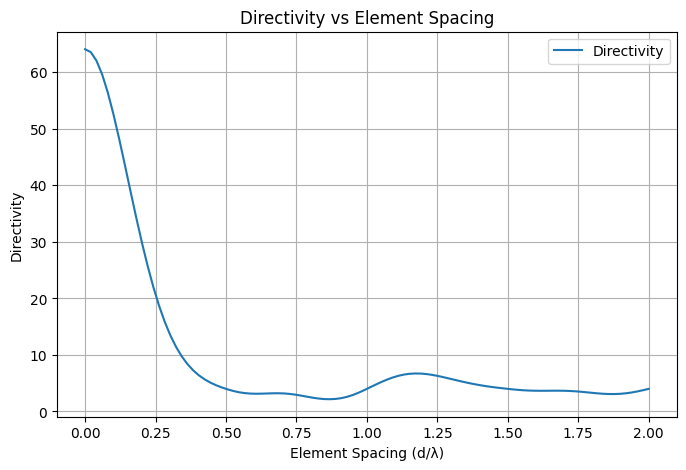

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define antenna parameters
f = 1e9          # Frequency in Hz
c = 3e8          # Speed of light in m/s
lam = c / f      # Wavelength in m
k = 2 * np.pi / lam  # Wave number
eta = 377        # Intrinsic impedance of free space
Pel = 1          # Radiated power
r = 1            # Observation distance

# Define element spacing range
num_points = 100
d_values = np.linspace(0, 2*lam, num_points)  # Range of element spacings

# Number of elements in the array
N = 4  
directivity_values = []

# Loop over different element spacings
for d in d_values:
    # Define the receiver positions
    rx = np.array([n * d for n in range(N)])  # Positions of elements
    
    # Compute overlap matrix A
    A = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            r_mn = abs(rx[m] - rx[n])  # Distance between elements
            A[m, n] = np.sinc(k * r_mn / np.pi)  # Corrected sinc function

    # Compute Ep (Array Excitation Pattern)
    A = 7.75*A
    w = np.ones((N, 1))  # Uniform weighting
    Ep = np.dot(A, w)

    # Compute Directivity
    D = (N * ((1 / (2 * eta)) * np.abs(Ep) ** 2)) / (Pel / (4 * np.pi * r**2))
    
    # Store maximum directivity for this spacing
    directivity_values.append(np.max(D))

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(d_values / lam, directivity_values, label="Directivity")
plt.axhline(y=4, color='r', linestyle='--', label="Theoretical D=4 at d=λ/2")
plt.xlabel("Element Spacing (d/λ)")
plt.ylabel("Directivity")
plt.title("Directivity vs Element Spacing")
plt.grid(True)
plt.legend()
plt.show()
